In [26]:
import fairlearn.metrics as flm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from sklearn.tree import DecisionTreeClassifier, plot_tree

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('../data/final.csv').iloc[:, 1:]

df.head()

,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,DaytimeRoutes_N,DaytimeRoutes_Q,DaytimeRoutes_R,DaytimeRoutes_D,DaytimeRoutes_W,DaytimeRoutes_B,DaytimeRoutes_F,DaytimeRoutes_M,DaytimeRoutes_A,DaytimeRoutes_C,DaytimeRoutes_E,DaytimeRoutes_S,DaytimeRoutes_J,DaytimeRoutes_Z,DaytimeRoutes_1,DaytimeRoutes_2,DaytimeRoutes_3,DaytimeRoutes_L,DaytimeRoutes_G,DaytimeRoutes_5,DaytimeRoutes_4,DaytimeRoutes_7,DaytimeRoutes_6,median,binary_target,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Moderately rent-burdened households,Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate
0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1097.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,529.0,0.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1633.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2770.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3251.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61


In [9]:
target = 'binary_target'

x = df.drop(['Neighborhood', 'Datetime', target], axis =1)
y = df.loc[:, target]

display(x.head())
display(y.head())

,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,DaytimeRoutes_N,DaytimeRoutes_Q,DaytimeRoutes_R,DaytimeRoutes_D,DaytimeRoutes_W,DaytimeRoutes_B,DaytimeRoutes_F,DaytimeRoutes_M,DaytimeRoutes_A,DaytimeRoutes_C,DaytimeRoutes_E,DaytimeRoutes_S,DaytimeRoutes_J,DaytimeRoutes_Z,DaytimeRoutes_1,DaytimeRoutes_2,DaytimeRoutes_3,DaytimeRoutes_L,DaytimeRoutes_G,DaytimeRoutes_5,DaytimeRoutes_4,DaytimeRoutes_7,DaytimeRoutes_6,median,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Moderately rent-burdened households,Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate
0,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1097.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
1,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,529.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
2,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1633.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
3,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2770.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61
4,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3251.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61


0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: binary_target, dtype: float64

In [28]:
clf = DecisionTreeClassifier(max_depth=10, random_state=0)
clf.fit(x, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

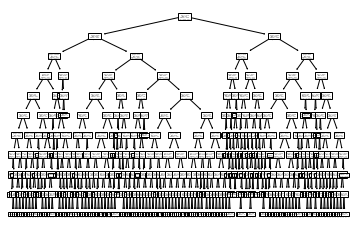

In [29]:
plot_tree(clf)
plt.show()

In [30]:
df['binary_target_prediction'] = clf.predict(x)

df.head()

,Neighborhood,Datetime,EntriesExits,Division_BMT,Division_IND,Division_IRT,Structure_At Grade,Structure_Elevated,Structure_Open Cut,Structure_Subway,Structure_Viaduct,Borough_Bk,Borough_Bx,Borough_M,Borough_Q,ConnectingLine_N,ConnectingLine_Q,ConnectingLine_R,ConnectingLine_D,ConnectingLine_W,ConnectingLine_B,ConnectingLine_F,ConnectingLine_M,ConnectingLine_A,ConnectingLine_C,ConnectingLine_E,ConnectingLine_S,ConnectingLine_J,ConnectingLine_Z,ConnectingLine_1,ConnectingLine_2,ConnectingLine_3,ConnectingLine_L,ConnectingLine_G,ConnectingLine_5,ConnectingLine_4,ConnectingLine_7,ConnectingLine_6,DaytimeRoutes_N,DaytimeRoutes_Q,DaytimeRoutes_R,DaytimeRoutes_D,DaytimeRoutes_W,DaytimeRoutes_B,DaytimeRoutes_F,DaytimeRoutes_M,DaytimeRoutes_A,DaytimeRoutes_C,DaytimeRoutes_E,DaytimeRoutes_S,DaytimeRoutes_J,DaytimeRoutes_Z,DaytimeRoutes_1,DaytimeRoutes_2,DaytimeRoutes_3,DaytimeRoutes_L,DaytimeRoutes_G,DaytimeRoutes_5,DaytimeRoutes_4,DaytimeRoutes_7,DaytimeRoutes_6,median,binary_target,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Moderately rent-burdened households,Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate,binary_target_prediction
0,Astoria,2020-03-01 00:00:00,1789.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1097.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,1.0
1,Astoria,2020-03-01 04:00:00,469.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,529.0,0.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,0.0
2,Astoria,2020-03-01 08:00:00,1762.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1633.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,1.0
3,Astoria,2020-03-01 12:00:00,3393.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2770.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,1.0
4,Astoria,2020-03-01 16:00:00,4000.0,1,1,1,0,1,0,1,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3251.0,1.0,81.6,4.6,36.8,67650,1670,24.1,16.7,24.3,8.2,47.5,164321,13.0,10.3,4.61,1.0


In [139]:
df.to_csv('../data/final_predictions.csv', index=False)

In [42]:
df.columns

Index(['Neighborhood', 'Datetime', 'EntriesExits', 'Division_BMT',
       'Division_IND', 'Division_IRT', 'Structure_At Grade',
       'Structure_Elevated', 'Structure_Open Cut', 'Structure_Subway',
       'Structure_Viaduct', 'Borough_Bk', 'Borough_Bx', 'Borough_M',
       'Borough_Q', 'ConnectingLine_N', 'ConnectingLine_Q', 'ConnectingLine_R',
       'ConnectingLine_D', 'ConnectingLine_W', 'ConnectingLine_B',
       'ConnectingLine_F', 'ConnectingLine_M', 'ConnectingLine_A',
       'ConnectingLine_C', 'ConnectingLine_E', 'ConnectingLine_S',
       'ConnectingLine_J', 'ConnectingLine_Z', 'ConnectingLine_1',
       'ConnectingLine_2', 'ConnectingLine_3', 'ConnectingLine_L',
       'ConnectingLine_G', 'ConnectingLine_5', 'ConnectingLine_4',
       'ConnectingLine_7', 'ConnectingLine_6', 'DaytimeRoutes_N',
       'DaytimeRoutes_Q', 'DaytimeRoutes_R', 'DaytimeRoutes_D',
       'DaytimeRoutes_W', 'DaytimeRoutes_B', 'DaytimeRoutes_F',
       'DaytimeRoutes_M', 'DaytimeRoutes_A', 'DaytimeRou

In [137]:
grouped_metric = flm.MetricFrame(metrics={'N': flm.count,
                                          'Accuracy': skm.accuracy_score,
                                          'Selection Rate': flm.selection_rate,
                                          'True Positive Rate': flm.true_positive_rate,
                                          'False Positive Rate': flm.false_positive_rate,
                                          },
                                 y_true=df[target],
                                 y_pred=df[target + '_prediction'],
                                 sensitive_features=df['Structure_Elevated'])

grouped_metric.overall.to_frame().transpose()

,N,Accuracy,Selection Rate,True Positive Rate,False Positive Rate
0,28152,0.968457,0.519075,0.977657,0.041132


In [111]:
flm.selection_rate(y_true=df[target],
                   y_pred=df[target + '_prediction'], 
                   pos_label=1)

0.519075021312873

## Demographic Parity Difference

Aka:
- Difference in selection rates
- Difference in positive proportions in predicted labels

In [65]:
df.loc[(df['Structure_Elevated'] == 1), [target + '_prediction']].sum() / \
df.loc[(df['Structure_Elevated'] == 1), [target + '_prediction']].count()

binary_target_prediction    0.401235
dtype: float64

In [66]:
df.loc[(df['Structure_Elevated'] == 0), [target + '_prediction']].sum() / \
df.loc[(df['Structure_Elevated'] == 0), [target + '_prediction']].count()

binary_target_prediction    0.651646
dtype: float64

In [50]:
flm.demographic_parity_difference(y_true=df[target],
                                  y_pred=df[target + '_prediction'], 
                                  sensitive_features=df['Structure_Elevated'],
                                  method='between_groups')

0.2504109634997316

## Equalized Odds Difference

In [76]:
flm.equalized_odds_difference(y_true=df[target],
                              y_pred=df[target + '_prediction'], 
                              sensitive_features=df['Structure_Elevated'],
                              method='between_groups')

0.028318268595676876

## Predictive Parity

For each subgroup, calculate the proportion of actual 1s over predicted 1s

In [85]:
df.loc[(df['Structure_Elevated'] == 1), [target]].sum()[0] / \
df.loc[(df['Structure_Elevated'] == 1), [target + '_prediction']].sum()[0]

0.972742474916388

In [86]:
df.loc[(df['Structure_Elevated'] == 0), [target]].sum()[0] / \
df.loc[(df['Structure_Elevated'] == 0), [target + '_prediction']].sum()[0]

0.9903857291787328

In [122]:
def predictive_parity(y_true, y_pred):
    if y_pred.sum() == 0:
        return np.nan
    return y_true.sum() / y_pred.sum()

In [138]:
grouped_metric = flm.MetricFrame(metrics={'N': flm.count,
                                          'Accuracy': skm.accuracy_score,
                                          'Selection Rate': flm.selection_rate,
                                          'True Positive Rate': flm.true_positive_rate,
                                          'False Positive Rate': flm.false_positive_rate,
                                          'Predictive Parity': predictive_parity
                                          },
                                 y_true=df[target],
                                 y_pred=df[target + '_prediction'],
                                 sensitive_features=df['Structure_Elevated'])

results = grouped_metric.by_group
# feature_name = results.index.name
# results['Feature Name'] = feature_name

# results = results.reset_index()
# results = results.rename({feature_name: 'Values'}, axis=1)
# results = results.set_index('Feature Name')
results

,N,Accuracy,Selection Rate,True Positive Rate,False Positive Rate,Predictive Parity
Structure_Elevated,,,,,,
0,13248,0.979695,0.651646,0.989123,0.037463,0.990386
1,14904,0.958468,0.401235,0.960805,0.043029,0.972742


In [186]:
def predictive_parity_difference(y_true, y_pred, sensitive_feature):
    pps = list()
    
    for val in sensitive_feature.unique():
        idxs = sensitive_feature.values == val
        y_true_subgroup = y_true.values[idxs]
        y_pred_subgroup = y_pred.values[idxs]
        
        pp = predictive_parity(y_true_subgroup, y_pred_subgroup)
        pps.append(pp)
        
    return max(pps) - min(pps)

In [187]:
predictive_parity_difference(
    y_true=df[target],
    y_pred=df[target + '_prediction'], 
    sensitive_feature=df['Structure_Elevated']
)

0.01764325426234481

,Demographic Parity Difference,Equalised Odds Difference,Predictive Parrity Difference
Overall,0.250411,0.028318,0.017643
